# OPEN CV2.

Opencv is a python wrapper used in machine learning, computer vision, and image processing. This module is commonly used for object detection in images and videos. When intergrated with other open source python libraries such as numpy and  matplotlib it can be optimized for powerful tasks sucj as face and handwritten notes detection.



## 1. Basic Operations.

In [2]:
# Import modules

import cv2 
import numpy as np 
import matplotlib as plt
from copy import deepcopy
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#cat1 = cv2.imread("Data/Image samples/cat1.png", 0)
#print(cat1.shape())

# To read image from disk in grey band 
img = cv2.imread("Img_analysis/cat1.png", 0)
print(f'Image array : \n{img} \n\n Shape (height * width) : {img.shape}')

# Read pixel value of the third row , third column , indexing starts at 0 
print(f'Pixel in r3 c3 : {img[2,2]}')

Image array : 
[[170 173 177 ... 190 190 190]
 [170 173 177 ... 190 190 190]
 [173 175 179 ... 190 190 190]
 ...
 [184 207 226 ... 227 235 243]
 [179 195 206 ... 231 239 247]
 [173 182 184 ... 233 241 249]] 

 Shape (height * width) : (288, 216)
Pixel in r3 c3 : 179


In [4]:
# Display a function to display image in a window 


# Function
def wind(img):
    # 1.Define window nmae and its size 
    cv2.namedWindow("image", cv2.WINDOW_NORMAL)

    # 2. Create window to display 
    cv2.imshow("image", img)

    # 3. Hold window for 5 sec or 5000 miliseconds
    # If value is 0 the window will be indefinate  
    cv2.waitKey(0)

    # 4. Remove the gui from the screen 
    cv2.destroyAllWindows()


# Call function 
wind(img)

In [5]:
# Display image in RGB format 

cat1 = cv2.imread("Img_analysis/cat1.png", 1)
wind(cat1)

print(cat1.shape)

(288, 216, 3)


In [6]:
# Draw a circle at coordinates 100, 120

# Create a copy of the image to prevent repeated circle drawings 
cat1_cpy = deepcopy(cat1)
# Define center coordinates, circle radius, colour combination(BGR format), and thicknes
circle1 = cv2.circle(cat1_cpy, (100, 120), 50, (20, 10, 200), 10)
wind(circle1)

# 2. Events.

OpenCV sometimes helps to control and manage different types of mouse events and gives us the flexibility to manage them, they include left click, right click, or double click. Such events can be managed when the window is opened by calling callback functions with commands of behavour needed. 

In [7]:
# Lets write a code that spots the differences in the following two images.
double = cv2.imread("Img_analysis/double_cat.png", 1)
wind(double)

<center><img src="../Image_Processing/Img_analysis/double_cat.png" width=600px height=300px /></center>



In [7]:
# Create a copy of original images
double_cpy = deepcopy(double)

# Draw a circle in the event of a double click
def drawCircleEvent(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        # Draw circle 
        cv2.circle(double_cpy, (x, y), 50, (20, 10, 200), 10)

# Define window 
cv2.namedWindow("differences", cv2.WINDOW_NORMAL)

# Attach event 
cv2.setMouseCallback("differences", drawCircleEvent)


# Use a while loop to keep the window continous 
while True:
    cv2.imshow("differences", double_cpy)
    a = cv2.waitKey(1000)       # wait for one second
    
    # Break loop using escape key(code 27)
    if a == 27: 
        break
    
# Destroy all windows when loop stops 
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

## 3. Splitting Channels. 

In [9]:
# Read image 
cat3 = cv2.imread("Img_analysis/cat2.png", 1)
# wind(cat3)

# Split bands to individual ones 
b,g,r = cv2.split(cat3)

In [10]:
# View whole image 
print(f'IMAGE : \n {cat3} \n---------------\n')

# View a band
print(f'Sample band : \n {r} \n----------\n')

IMAGE : 
 [[[ 2  0  0]
  [ 2  0  0]
  [ 2  0  0]
  ...
  [ 0  0  5]
  [ 0  0  5]
  [ 0  0  6]]

 [[ 2  0  0]
  [ 2  0  0]
  [ 2  0  0]
  ...
  [ 0  0  5]
  [ 0  0  5]
  [ 0  0  6]]

 [[ 2  0  0]
  [ 2  0  0]
  [ 2  0  0]
  ...
  [ 0  0  5]
  [ 0  0  5]
  [ 0  0  6]]

 ...

 [[45 58 80]
  [22 36 58]
  [ 4 20 43]
  ...
  [15 24 33]
  [ 4 13 22]
  [ 0  5 14]]

 [[46 59 81]
  [20 33 55]
  [ 1 15 38]
  ...
  [17 26 35]
  [ 2  9 18]
  [ 2  9 18]]

 [[49 60 82]
  [18 31 53]
  [ 0 14 37]
  ...
  [20 28 35]
  [ 4 10 17]
  [18 24 31]]] 
---------------

Sample band : 
 [[ 0  0  0 ...  5  5  6]
 [ 0  0  0 ...  5  5  6]
 [ 0  0  0 ...  5  5  6]
 ...
 [80 58 43 ... 33 22 14]
 [81 55 38 ... 35 18 18]
 [82 53 37 ... 35 17 31]] 
----------



In [11]:
# Extracting RGB values of the pixel in 50,50
# Here we have randomly chosen a pixel
# by passing in 100, 100 for height and width.
(B, G, R) = cat3[100, 100]

# Displaying the pixel values
print("R = {}, G = {}, B = {}".format(R, G, B))

R = 167, G = 159, B = 146


In [12]:
# Display coloured image 
wind(cat3)

<center><img src="../Image_Processing/Img_analysis/cat2.png" width=600px height=300px /></center>

In [13]:
# Find the difference between green and red bands 
wind(g-r)

<center><img src="../Image_Processing/Img_analysis/G-R_band.png" width=600px height=300px /></center>

## 4. Resizing, Cropping and Exporting Image.

### 4.1 Resizing.
Resizing is the process of scalling images by reducing the number of pixels. This is an important step in machine learning process that as it directly impacts on the complexity of an algorithm. More pixels reduce speed. Algorithms used in resizing are commonly refered to as interpolation methods, they include : INTER_AREA, INTER_LINEAR and INTER_CUBIC. 

#### Effects of resizing.
1. Reducing size removes detail and may make image blurred.
2. Increasing size introduces artifacts or make it pixilated.
3. Differeny interpolation methods have varied effects on smoothness and sharpness. 

In [14]:
# Read image cat7 
cat7 = cv2.imread("Img_analysis/cat7.png", 1)

# Properties 
print(f'Properties : \n Type --> {type(cat7)}  \n Shape --> {cat7.shape} \n\
Size/No of pixels --> {cat7.size} \n Dimension --> {cat7.ndim}')

# Display
wind(cat7)

Properties : 
 Type --> <class 'numpy.ndarray'>  
 Shape --> (248, 251, 3) 
Size/No of pixels --> 186744 
 Dimension --> 3


<center><img src="../Image_Processing/Img_analysis/cat7.png" width=600px height=300px /></center>

In [15]:
# Resize to various sizes 

# Reduce by a fifth , 20% 
cat7_reduced1 = cv2.resize(cat7,           # Image to be resized
                    (0, 0),                # Dimension width x height of output
                    fx = 0.2,                # Scaling factor x axis
                    fy = 0.2,                # Scaling factoy y axis 
                    interpolation=cv2.INTER_CUBIC   # Find cube of all neighborhood pixels
                           )

# Resize to a 300 by 300 pixel
cat7_big = cv2.resize(cat7, (300, 300))

# stretch image 
cat7_linear = cv2.resize(cat7, (780, 540), interpolation = cv2.INTER_LINEAR)

In [16]:
# Display resized image 

wind(cat7_reduced1)

<center><img src="../Image_Processing/Img_analysis/resized1.png" width=600px height=300px /></center>

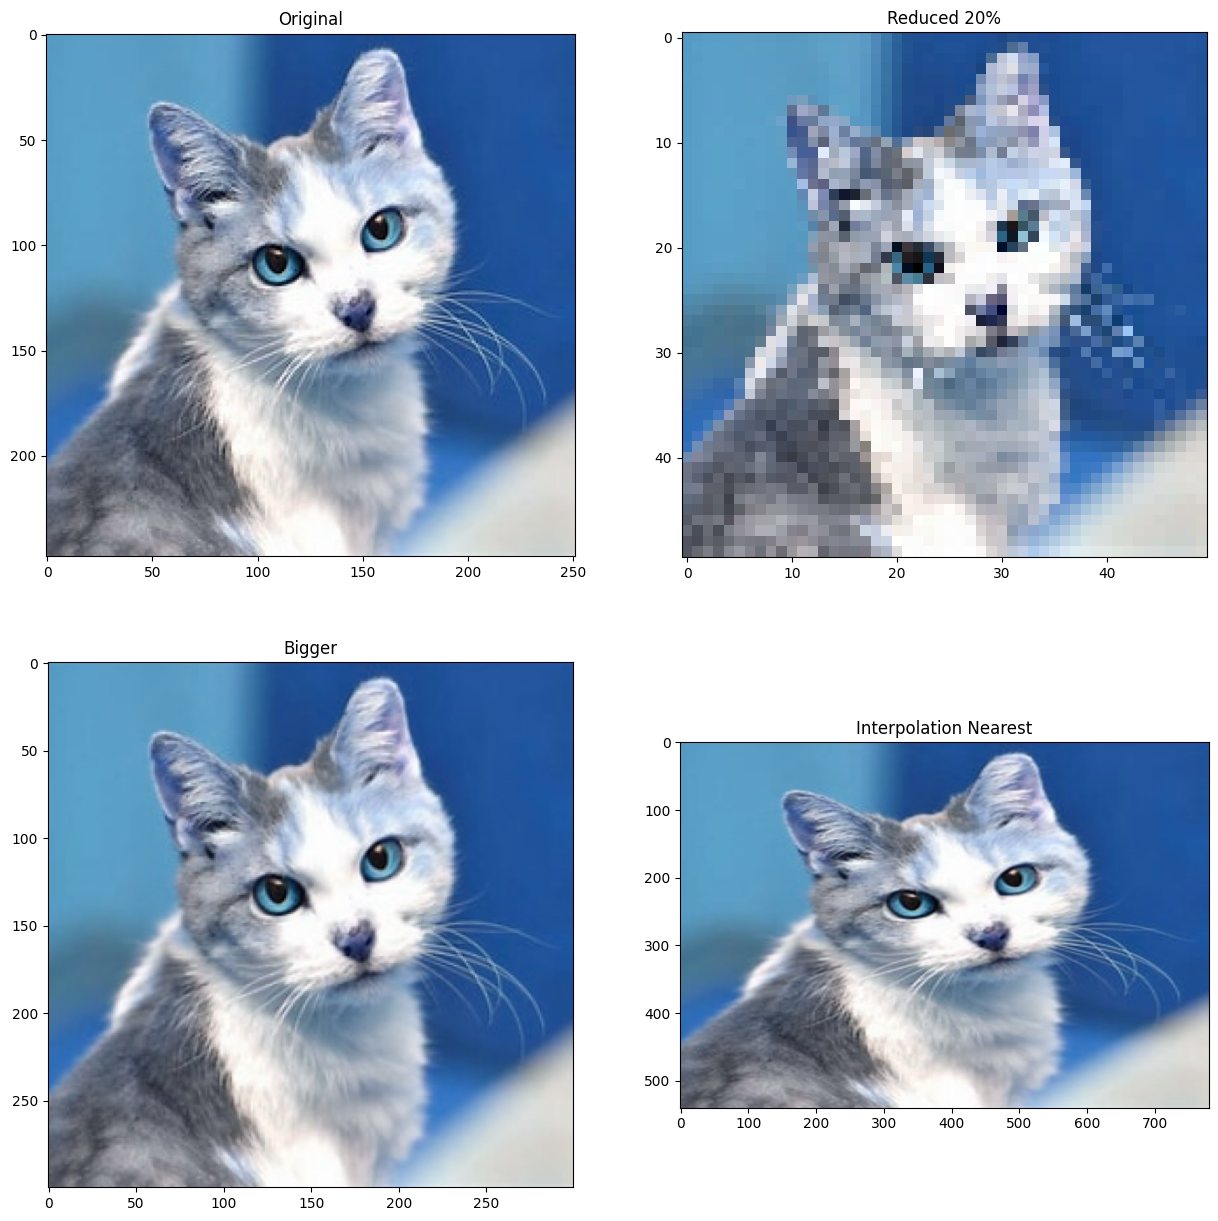

In [17]:
# Display all images with matplotlib 

Titles =["Original", "Reduced 20%", "Bigger", "Interpolation Nearest"]
images =[cat7 ,cat7_reduced1, cat7_big, cat7_linear]
count = 4

f, axs = plt.subplots(2, 2, figsize=(15, 15))
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])

plt.show()

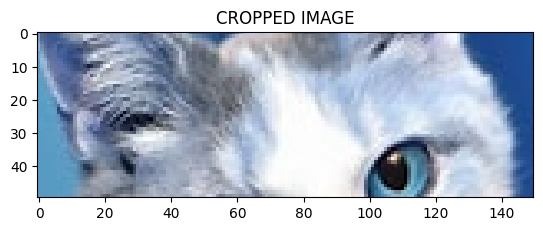

In [24]:
# Subset / crop , use upper left and bottom right coordinates [row size, column size]

subset = cat7[50:100, 50:200]

# Display 
plt.title('CROPPED IMAGE')
plt.imshow(subset)

plt.show()

In [25]:
# Export image 

cv2.imwrite('croped.png', subset)

True